## IST 652 FINAL PROJECT

TEAM MEMBERS - 
1. SUKHAD
2. BISWADIP
3. MIHIR
4. VAIBHAV 

Now lets focus on what is our project and what it exactly does.

A) **PROJECT TITLE**:- Impact of Weather Conditions on Motor Vehicle Collisions in New York City

B) **GOAL OF OUR PROJECT**
Our project aims to explore how diverse weather conditions affect the frequency and severity of motor vehicle collisions in new york city. Using collision and weather datasets, we will investigate correlations between weather conditions and variations in collision trends, identify high-risk locations and periods, and provide actionable recommendations to enhance road safety. The findings aim to support city planners and policymakers in mitigating risks associated with adverse weather conditions.


#### **Motivation and Background**  

Traffic safety in urban areas like **New York City** is a critical issue due to its dense network of vehicles, pedestrians, and cyclists. The unpredictable nature of **weather conditions**—whether it’s rain, snow, fog, or extreme heat—adds further challenges, increasing the risk of accidents. Understanding how weather impacts collision patterns can provide valuable insights to improve **urban planning**, **traffic management**, and **policy-making**.



#### **Why This Problem Matters**  

1. **Increasing Collisions**:  
   NYC experiences a high volume of accidents annually, leading to **injuries, fatalities**, and **property damage**. Analyzing the role of weather and human factors can help reduce these incidents.  

2. **Economic Costs**:  
   Accidents result in significant financial burdens, including **healthcare costs**, **vehicle repairs**, traffic delays, and lost productivity.  

3. **Weather as a Risk Factor**:  
   While fair weather sees more collisions due to higher traffic volume, adverse weather conditions like **rain, snow**, and **fog** amplify risks. Reduced visibility, slippery roads, and driver errors under these conditions often lead to more severe outcomes.  

4. **Improved Planning and Management**:  
   Identifying high-risk boroughs like **Brooklyn** enables better allocation of resources, enhanced infrastructure (e.g., safer intersections, improved lighting), and targeted interventions during peak times or poor weather conditions.  

5. **Human Error and Behavior**:  
   Issues like **driver inattention**, **tailgating**, and failure to follow traffic rules are top contributors to collisions. Addressing these through **driver education** and stricter enforcement can significantly enhance safety.  



#### **Research Questions and Their Impact**  

**Research Questions**

1) How do weather conditions influence the frequency and severity of vehicle collisions?

2) What are the peak times for vehicle collisions under different weather conditions?

3) Which vehicle categories get affected most in fatal crashes?

4) Which top 10 contributing factors are most commonly associated with severe sedan collisions?

5) Which location (hotspots) have the highest collision frequency for sedan?

This project explores how weather, vehicle types, and specific locations impact accidents. The findings are essential for:  

1. **Accident Prevention**:  
   Understanding weather-related patterns allows for **proactive safety measures**, such as early weather warnings, timely road treatments, and advising commuters to adjust travel plans.  

2. **Resource Optimization**:  
   By pinpointing **collision hotspots** like Brooklyn, authorities can deploy traffic enforcement, emergency services, and road maintenance teams more efficiently.  

3. **Policy Development**:  
   Insights into causes like driver inattention can support policies for **Advanced Driver Assistance Systems (ADAS)** and stricter distracted driving laws.  

4. **Urban Safety Enhancements**:  
   Identifying trends across boroughs and vehicle types can drive improvements such as **better road drainage**, **weather-specific signage**, and safer pedestrian pathways.  


#### **Real-World Impact**  

The outcomes of this study bridge the gap between **data analysis** and **practical solutions**. By addressing these questions:  
- NYC can implement targeted strategies to **reduce collisions** and save lives.  
- Commuters can make safer, more informed travel decisions.  
- Urban planners, policymakers, and enforcement agencies can prioritize **high-risk areas** and improve infrastructure.  

Ultimately, this research contributes to building a **safer, smarter, and more resilient transportation system**. The approach is scalable, offering a blueprint for improving road safety in other cities facing similar challenges.  

## DATASET DESCRIPTION 

We are using two datasets which are as follows:

Motor Vehicles Collisions - Crashes 
Link: "https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes"

Weather Data meteostat python
Link: "https://dev.meteostat.net/python/"

Rows in Collision dataset - 21301526

Columns in Collision Dataset - 29

Rows in weather dataset - 21301526

Columns in weather Dataset - 10




## METHODOLOGY



## DATA PREPARATION AND CLEANING

In [3]:
import pandas as pd
df= pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')
df.info()


FileNotFoundError: [Errno 2] No such file or directory: 'Motor_Vehicle_Collisions_-_Crashes.csv'

### The dataset contains 1,048,575 rows and 29 columns.

#### Column Information:

Each column represents a specific feature of the dataset, such as crash details, location, and outcomes.
Some notable columns include:
**CRASH DATE, CRASH TIME:** Date and time of the crash (object type).
**BOROUGH, ZIP CODE:** Location information (object type for boroughs and ZIP).
**NUMBER OF PERSONS INJURED/KILLED:** Numeric details about injuries and fatalities (int/float).
**VEHICLE TYPE CODE 1–5:** Types of vehicles involved in crashes (object type).
**CONTRIBUTING FACTOR VEHICLE 1–5:** Factors that contributed to the crash (object type).

Non-Null Counts:

Some columns, like CRASH DATE and NUMBER OF PERSONS INJURED, have complete data.
Others, like BOROUGH and ON STREET NAME, have missing values (fewer non-null counts).

In [21]:
df_unspecified=df[df['CONTRIBUTING FACTOR VEHICLE 1']=='Unspecified']
df_unspecified['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()

CONTRIBUTING FACTOR VEHICLE 4
Unspecified    7472
Name: count, dtype: int64

The number of unspecified values in the 'CONTRIBUTING FACTOR VEHICLE 4' is 2090

In [22]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       720524
Driver Inattention/Distraction    428874
Failure to Yield Right-of-Way     126938
Following Too Closely             114360
Backing Unsafely                   78404
                                   ...  
Windshield Inadequate                 83
Cell Phone (hand-held)                79
Texting                               53
Listening/Using Headphones            26
1                                     10
Name: count, Length: 61, dtype: int64

**Here we can see that the 'Unspecified' values in this column is second highest which is 241868. This does not describe anything about the data as all the details are missing. Thus we will be dropping these rows completely in order to maintain outlier free data.**

In [23]:
# Remove rows where 'CONTRIBUTING FACTOR VEHICLE 1' is 'Unspecified'
df_cleaned = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Optionally, reset the index after removal
df_cleaned.reset_index(drop=True, inplace=True)

In [24]:
pd.set_option('display.max_columns', None)
df_cleaned


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
4,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410631,08/06/2024,9:00,NaN,NaN,40.664960,-73.822260,"(40.66496, -73.82226)",BELT PARKWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4745999,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1410632,08/06/2024,20:39,NaN,NaN,NaN,NaN,NaN,CLEARVIEW EXPRESSWAY,35 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,4746046,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
1410633,08/06/2024,12:00,QUEENS,11001.0,NaN,NaN,NaN,JAMAICA AVENUE,LITTLE NECK PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4746496,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1410634,07/29/2024,2:30,NaN,NaN,40.723442,-73.938990,"(40.723442, -73.93899)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4746455,Tractor Truck Diesel,Sedan,NaN,NaN,NaN


In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410636 entries, 0 to 1410635
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH DATE                     1410636 non-null  object 
 1   CRASH TIME                     1410636 non-null  object 
 2   BOROUGH                        919679 non-null   object 
 3   ZIP CODE                       919495 non-null   object 
 4   LATITUDE                       1256019 non-null  float64
 5   LONGITUDE                      1256019 non-null  float64
 6   LOCATION                       1256019 non-null  object 
 7   ON STREET NAME                 1108692 non-null  object 
 8   CROSS STREET NAME              812259 non-null   object 
 9   OFF STREET NAME                245126 non-null   object 
 10  NUMBER OF PERSONS INJURED      1410629 non-null  float64
 11  NUMBER OF PERSONS KILLED       1410618 non-null  float64
 12  NUMBER OF PEDE

**Location column gives us a concrete location of where the accident happened in New york city. Thus, we decided to drop all the rows where location column had null values, leading to more location accurate data.**

In [26]:
# Remove rows where 'LOCATION' is NaN
df_cleaned = df_cleaned.dropna(subset=['LOCATION'])

# Optionally, reset the index after removal
df_cleaned.reset_index(drop=True, inplace=True)

In [27]:
df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction                           387059
Failure to Yield Right-of-Way                            115953
Following Too Closely                                     97992
Backing Unsafely                                          71824
Other Vehicular                                           58788
Passing or Lane Usage Improper                            54317
Passing Too Closely                                       50224
Turning Improperly                                        45624
Fatigued/Drowsy                                           37788
Unsafe Lane Changing                                      35774
Traffic Control Disregarded                               34458
Driver Inexperience                                       30362
Unsafe Speed                                              28096
Alcohol Involvement                                       21441
Reaction to Uninvolved Vehicle                            18147
Lost Consc

In [28]:
# Standardize some common variations
df_cleaned.loc[:, 'CONTRIBUTING FACTOR VEHICLE 1'] = df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].replace({
    'Drugs (Illegal)': 'Drugs (illegal)',
    'Cell Phone (hand-Held)': 'Cell Phone (hand-held)',
    'Reaction to Other Uninvolved Vehicle': 'Reaction to Uninvolved Vehicle'
})
# Remove rows with specific non-descriptive values
df_cleaned = df_cleaned[~df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].isin(['80', '1'])]


In [29]:
# Replace low-frequency factors with 'Other'
factor_counts = df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
low_frequency_factors = factor_counts[factor_counts < 100].index
# Replace low-frequency factors with 'Other' using loc
df_cleaned.loc[:, 'CONTRIBUTING FACTOR VEHICLE 1'] = df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].replace(low_frequency_factors, 'Other')


In [30]:
df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Driver Inattention/Distraction                           387059
Failure to Yield Right-of-Way                            115953
Following Too Closely                                     97992
Backing Unsafely                                          71824
Other Vehicular                                           58788
Passing or Lane Usage Improper                            54317
Passing Too Closely                                       50224
Turning Improperly                                        45624
Fatigued/Drowsy                                           37788
Unsafe Lane Changing                                      35774
Traffic Control Disregarded                               34458
Driver Inexperience                                       30362
Unsafe Speed                                              28096
Alcohol Involvement                                       21441
Reaction to Uninvolved Vehicle                            19293
Lost Consc

**We removed the contributing factors which had very less frequency, Factors with less frequency does not really add anything to the analysis.** 

In [31]:
# Convert 'CONTRIBUTING FACTOR VEHICLE 1,2,3,4 and 5' to a categorical type
df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'] = pd.Categorical(df_cleaned['CONTRIBUTING FACTOR VEHICLE 1'])
df_cleaned['CONTRIBUTING FACTOR VEHICLE 2'] = pd.Categorical(df_cleaned['CONTRIBUTING FACTOR VEHICLE 2'])
df_cleaned['CONTRIBUTING FACTOR VEHICLE 3'] = pd.Categorical(df_cleaned['CONTRIBUTING FACTOR VEHICLE 3'])
df_cleaned['CONTRIBUTING FACTOR VEHICLE 4'] = pd.Categorical(df_cleaned['CONTRIBUTING FACTOR VEHICLE 4'])
df_cleaned['CONTRIBUTING FACTOR VEHICLE 5'] = pd.Categorical(df_cleaned['CONTRIBUTING FACTOR VEHICLE 5'])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255952 entries, 0 to 1256018
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype   
---  ------                         --------------    -----   
 0   CRASH DATE                     1255952 non-null  object  
 1   CRASH TIME                     1255952 non-null  object  
 2   BOROUGH                        891436 non-null   object  
 3   ZIP CODE                       891266 non-null   object  
 4   LATITUDE                       1255952 non-null  float64 
 5   LONGITUDE                      1255952 non-null  float64 
 6   LOCATION                       1255952 non-null  object  
 7   ON STREET NAME                 987000 non-null   object  
 8   CROSS STREET NAME              724285 non-null   object  
 9   OFF STREET NAME                230993 non-null   object  
 10  NUMBER OF PERSONS INJURED      1255945 non-null  float64 
 11  NUMBER OF PERSONS KILLED       1255935 non-null  float64 
 12  NUMBE

### Categorizing CONTRIBUTING FACTOR VEHICLE 1,2,3,4 and 5 as Moderate , Minor and Severe

In [32]:
# Define severity mapping as before
severity_mapping = {
    'Driver Inattention/Distraction': 'Moderate',
    'Following Too Closely': 'Moderate',
    'Failure to Yield Right-of-Way': 'Moderate',
    'Backing Unsafely': 'Minor',
    'Passing or Lane Usage Improper': 'Moderate',
    'Passing Too Closely': 'Moderate',
    'Other Vehicular': 'Minor',
    'Unsafe Lane Changing': 'Moderate',
    'Turning Improperly': 'Moderate',
    'Traffic Control Disregarded': 'Moderate',
    'Driver Inexperience': 'Minor',
    'Unsafe Speed': 'Moderate',
    'Fatigued/Drowsy': 'Moderate',
    'Reaction to Uninvolved Vehicle': 'Minor',
    'Alcohol Involvement': 'Severe',
    'Pavement Slippery': 'Minor',
    'View Obstructed/Limited': 'Minor',
    'Oversized Vehicle': 'Minor',
    'Lost Consciousness': 'Severe',
    'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Moderate',
    'Aggressive Driving/Road Rage': 'Severe',
    'Outside Car Distraction': 'Minor',
    'Prescription Medication': 'Moderate',
    'Passenger Distraction': 'Minor',
    'Brakes Defective': 'Moderate',
    'Fell Asleep': 'Severe',
    'Physical Disability': 'Minor',
    'Obstruction/Debris': 'Minor',
    'Glare': 'Minor',
    'Steering Failure': 'Severe',
    'Failure to Keep Right': 'Minor',
    'Tire Failure/Inadequate': 'Moderate',
    'Pavement Defective': 'Minor',
    'Illnes': 'Minor',
    'Animals Action': 'Minor',
    'Driverless/Runaway Vehicle': 'Moderate',
    'Other Electronic Device': 'Minor',
    'Drugs (illegal)': 'Severe',
    'Illness': 'Minor',
    'Accelerator Defective': 'Severe',
    'Lane Marking Improper/Inadequate': 'Minor',
    'Traffic Control Device Improper/Non-Working': 'Minor',
    'Cell Phone (hand-held)': 'Moderate',
    'Other': 'Minor',
    'Tow Hitch Defective': 'Minor',
    'Other Lighting Defects': 'Minor',
    'Cell Phone (hands-free)': 'Minor',
    'Tinted Windows': 'Minor',
    'Using On Board Navigation Device': 'Minor',
    'Vehicle Vandalism': 'Minor'
}

# Severity order for categorical conversion
severity_order = ['Minor', 'Moderate', 'Severe']

# Apply the mapping and convert each contributing factor column to a new severity level column
for i in range(1, 6):
    factor_column = f'CONTRIBUTING FACTOR VEHICLE {i}'
    severity_column = f'SEVERITY_LEVEL_{i}'
    
    # Map to severity level and create a new column
    df_cleaned[severity_column] = df_cleaned[factor_column].map(severity_mapping)
    
    # Convert to an ordered categorical type
    df_cleaned[severity_column] = pd.Categorical(df_cleaned[severity_column], categories=severity_order, ordered=True)



#### Purpose of the Categorizing:
- To simplify and standardize analysis of crash contributing factors by grouping them into clear severity categories.
- To enable comparisons between severity levels in the data.
- To prepare the data for further analysis, such as identifying trends or correlations between severity levels and other variables (e.g., number of injuries, fatalities).

In [33]:
# Ensure 'CRASH DATE' is in datetime format and create a full datetime column
df_cleaned['CRASH DATE'] = pd.to_datetime(df_cleaned['CRASH DATE'])
df_cleaned['DATETIME'] = pd.to_datetime(df_cleaned['CRASH DATE'].astype(str) + ' ' + df_cleaned['CRASH TIME'])
df_cleaned['DATETIME'] = df_cleaned['DATETIME'].dt.floor('H')  # Round down to the nearest hour

### LOADING THE WEATHER DATASET

**For the weather data, we are using meteostat library of python which is an in-built weather API.**

In [34]:
!pip install meteostat

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [35]:
import pandas as pd
import json
from meteostat import Hourly, Point
import pandas as pd

# Load the JSON file
with open('full.json') as file:
    data = json.load(file)

# Flatten the JSON data
station= pd.json_normalize(data,sep='_')

station


,id,country,region,timezone,name_en,identifiers_national,identifiers_wmo,identifiers_icao,location_latitude,location_longitude,location_elevation,inventory_model_start,inventory_model_end,inventory_hourly_start,inventory_hourly_end,inventory_daily_start,inventory_daily_end,inventory_monthly_start,inventory_monthly_end,inventory_normals_start,inventory_normals_end,name_no,name_de,name_sv,name_fi,name_es
0,00FAY,CA,AB,America/Edmonton,Holden Agdm,32395,71227,CXHD,53.1900,-112.2500,688,2021-07-13,2024-11-17,2020-01-01,2024-11-08,2002-11-01,2024-03-13,2003.0,2022.0,1991.0,2020.0,NaN,NaN,NaN,NaN,NaN
1,00TG6,CA,AB,America/Edmonton,Athabasca 1,2459,None,None,54.7200,-113.2900,515,2021-07-13,2024-11-17,None,None,2000-01-01,2022-07-12,2000.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01001,NO,None,Europe/Oslo,Jan Mayen,None,01001,ENJA,70.9333,-8.6667,10,2018-01-28,2024-11-18,1931-01-01,2024-10-30,1921-12-31,2024-11-05,1922.0,2022.0,1961.0,2020.0,NaN,NaN,NaN,NaN,NaN
3,01002,NO,SJ,Europe/Oslo,Grahuken,None,01002,None,79.7833,14.4667,0,2021-07-05,2024-11-18,1986-11-09,2024-10-30,2010-10-07,2020-08-17,NaN,NaN,1961.0,2020.0,NaN,NaN,NaN,NaN,NaN
4,01003,NO,None,Europe/Oslo,Hornsund,None,01003,None,77.0000,15.5000,10,2021-01-01,2024-11-18,1985-06-01,2024-10-30,2009-11-26,2020-08-31,2016.0,2017.0,1961.0,1990.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22099,ZYHGP,NO,None,Europe/Oslo,Lysaker,SN18970,None,None,59.9190,10.6350,23,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22100,ZYITU,US,MI,America/Detroit,Selfridge Air National Guard Base,None,None,KMTC,42.6046,-82.8353,177,2022-04-24,2024-11-17,2022-04-23,2024-11-08,2022-04-24,2022-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22101,ZYTX0,CN,LN,Asia/Shanghai,Shenyang / Fengt'ien / Mukden,None,None,ZYTX,41.8000,123.4000,35,2021-01-02,2024-11-17,1992-07-01,2024-11-08,1994-03-07,2022-04-25,2006.0,2022.0,1961.0,1990.0,NaN,NaN,NaN,NaN,NaN
22102,ZZQV1,DE,NI,Europe/Berlin,Poppenburg (pegel),15839,None,None,52.1356,9.7620,75,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Extract latitude and longitude from the 'location' field
station['latitude'] = station['location_latitude']
station['longitude'] = station['location_longitude']

# Keep only relevant columns for matching
station = station[['id', 'latitude', 'longitude']]
station

,id,latitude,longitude
0,00FAY,53.1900,-112.2500
1,00TG6,54.7200,-113.2900
2,01001,70.9333,-8.6667
3,01002,79.7833,14.4667
4,01003,77.0000,15.5000
...,...,...,...
22099,ZYHGP,59.9190,10.6350
22100,ZYITU,42.6046,-82.8353
22101,ZYTX0,41.8000,123.4000
22102,ZZQV1,52.1356,9.7620


#### The dataset contains information about weather stations, which is loaded from a JSON file into a pandas DataFrame using pd.json_normalize(). It includes details such as station IDs, country, region, latitude, longitude, and inventory start and end dates. To streamline the data, latitude and longitude are extracted from their respective fields, and a simplified DataFrame is created containing only the station ID, latitude, and longitude columns. This cleaned dataset provides essential geographic information about the stations, making it ready for further analysis, such as mapping or matching tasks based on location.

In [37]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [38]:
import pandas as pd
from scipy.spatial import cKDTree
import numpy as np

# Prepare crash and station coordinates
crash_coords = df_cleaned[['LATITUDE', 'LONGITUDE']].values
station_coords = station[['latitude', 'longitude']].values

# Build a k-d tree for the station coordinates
station_tree = cKDTree(station_coords)

# Find the nearest station for each crash location
distances, indices = station_tree.query(crash_coords, k=1)

# Map the nearest station ID to each crash record
df_cleaned['nearest_station'] = station.iloc[indices]['id'].values
df_cleaned

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,SEVERITY_LEVEL_1,SEVERITY_LEVEL_2,SEVERITY_LEVEL_3,SEVERITY_LEVEL_4,SEVERITY_LEVEL_5,DATETIME,nearest_station
0,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-14 08:00:00,72502
1,2021-12-14,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,2021-12-14 17:00:00,72502
2,2021-12-14,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inexperience,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN,Minor,NaN,NaN,NaN,NaN,2021-12-14 21:00:00,72502
3,2021-12-14,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,2021-12-14 14:00:00,KNYC0
4,2021-12-13,0:34,NaN,NaN,40.701275,-73.888870,"(40.701275, -73.88887)",MYRTLE AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4486934,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,2021-12-13 00:00:00,KNYC0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256014,2024-08-06,1:10,NaN,NaN,40.747380,-73.761710,"(40.74738, -73.76171)",LONG ISLAND EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Other Vehicular,Driver Inattention/Distraction,NaN,NaN,NaN,4745716,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Minor,Moderate,NaN,NaN,NaN,2024-08-06 01:00:00,74486
1256015,2024-08-06,6:15,NaN,NaN,40.751080,-73.749150,"(40.75108, -73.74915)",LONG ISLAND EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4746029,Station Wagon/Sport Utility Vehicle,Tractor Truck Diesel,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,2024-08-06 06:00:00,74486
1256016,2024-08-04,19:27,NaN,NaN,40.610508,-74.095760,"(40.610508, -74.09576)",STATEN ISLAND EXPRESSWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Following Too Closely,Following Too Closely,Unspecified,NaN,NaN,4746578,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,Moderate,Moderate,NaN,NaN,NaN,2024-08-04 19:00:00,72502
1256017,2024-08-06,9:00,NaN,NaN,40.664960,-73.822260,"(40.66496, -73.82226)",BELT PARKWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4745999,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,2024-08-06 09:00:00,74486


### MERGING THE CRASH DATA AND WEATHER DATA

This merging process integrates crash data with weather station data, enabling analyses of how weather conditions influence crash occurrences. 

##### Preparation:

Crash coordinates (LATITUDE and LONGITUDE) and weather station coordinates (latitude and longitude) are extracted from their respective datasets.
These coordinates are converted into a numerical array format suitable for geospatial operations.

##### Building a KD-Tree:

A KD-Tree is created using the weather station coordinates. KD-Tree is a spatial data structure that enables fast nearest-neighbor searches, making it ideal for matching large datasets based on location.

##### Finding the Nearest Station:

For each crash record, the KD-Tree is queried to find the nearest weather station based on geospatial proximity (k=1 ensures only the closest station is considered).
The result includes the index of the nearest station for each crash.

##### Data Integration:

The crash dataset is updated with a new column, nearest_station, containing the ID of the nearest weather station for each crash record. This ensures that weather data from the associated station can be linked to the crash information.

In [39]:
import requests
import os


station_ids = df_cleaned['nearest_station'].unique()

# Base URL for downloading the full hourly data for each station
base_url = "https://bulk.meteostat.net/v2/hourly"

# Directory to save the files
os.makedirs("weather_data", exist_ok=True)

# Loop through each station ID, download the file, and save it
for station_id in station_ids:
    url = f"{base_url}/{station_id}.csv.gz"
    file_path = f"weather_data/{station_id}.csv.gz"
    
    try:
        response = requests.get(url, timeout=30)
        if response.status_code == 200:
            with open(file_path, "wb") as file:
                file.write(response.content)
            print(f"Downloaded {file_path}")
        else:
            print(f"Failed to download {file_path}: HTTP {response.status_code}")
    except requests.RequestException as e:
        print(f"Could not download {file_path}: {e}")


Downloaded weather_data/72502.csv.gz
Downloaded weather_data/KNYC0.csv.gz
Downloaded weather_data/74486.csv.gz
Downloaded weather_data/KLDJ0.csv.gz
Failed to download weather_data/15645.csv.gz: HTTP 404
Downloaded weather_data/KJRB0.csv.gz
Failed to download weather_data/99410.csv.gz: HTTP 404
Downloaded weather_data/KHPN0.csv.gz
Downloaded weather_data/91066.csv.gz
Failed to download weather_data/99537.csv.gz: HTTP 404
Downloaded weather_data/KSMQ0.csv.gz
Failed to download weather_data/99590.csv.gz: HTTP 404
Downloaded weather_data/70454.csv.gz
Downloaded weather_data/KN030.csv.gz
Downloaded weather_data/KFZY0.csv.gz
Downloaded weather_data/JIW6L.csv.gz
Downloaded weather_data/74757.csv.gz
Downloaded weather_data/KTEB0.csv.gz
Downloaded weather_data/72323.csv.gz
Downloaded weather_data/O5PFW.csv.gz
Downloaded weather_data/KJHW0.csv.gz


In [40]:
import pandas as pd
import gzip

# Define column names based on the Meteostat data structure
column_names = [
    "date", "hour", "temp", "dwpt", "rhum", "prcp", "snow", "wdir",
    "wspd", "wpgt", "pres", "tsun", "coco"
]

weather_data_frames = []

# Loop through downloaded files and load them
for station_id in station_ids:
    file_path = f"weather_data/{station_id}.csv.gz"
    
    # Check if the file exists and is not empty
    if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
        try:
            with gzip.open(file_path, "rt") as file:
                station_data = pd.read_csv(file, names=column_names)
                station_data['station_id'] = station_id  # Add station ID as a column
                weather_data_frames.append(station_data)
        except pd.errors.EmptyDataError:
            print(f"{file_path} has no data. Skipping.")
    else:
        print(f"File {file_path} is missing or empty. Skipping.")

# Concatenate all weather data into a single DataFrame
if weather_data_frames:
    weather_data = pd.concat(weather_data_frames, ignore_index=True)
else:
    weather_data = pd.DataFrame(columns=column_names + ['station_id'])
    print("No valid weather data files were found.")




File weather_data/15645.csv.gz is missing or empty. Skipping.
File weather_data/99410.csv.gz is missing or empty. Skipping.
File weather_data/99537.csv.gz is missing or empty. Skipping.
File weather_data/99590.csv.gz is missing or empty. Skipping.


In [41]:
weather_data[weather_data['station_id']=='KNYC0']

# List of station IDs that couldn't be downloaded
missing_station_ids = ['15645', '99410', '99537', '99590']  # Add any other missing IDs here

# Filter out rows where nearest_station is in the list of missing station IDs
df_cleaned = df_cleaned[~df_cleaned['nearest_station'].isin(missing_station_ids)]

df_cleaned['nearest_station'].value_counts()


nearest_station
KNYC0    535795
72502    349067
74486    243253
KJRB0     81244
KLDJ0     42671
91066        86
KHPN0         7
KSMQ0         5
74757         1
O5PFW         1
72323         1
KTEB0         1
70454         1
JIW6L         1
KFZY0         1
KN030         1
KJHW0         1
Name: count, dtype: int64

In [42]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252137 entries, 0 to 1256018
Data columns (total 36 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   CRASH DATE                     1252137 non-null  datetime64[ns]
 1   CRASH TIME                     1252137 non-null  object        
 2   BOROUGH                        888703 non-null   object        
 3   ZIP CODE                       888533 non-null   object        
 4   LATITUDE                       1252137 non-null  float64       
 5   LONGITUDE                      1252137 non-null  float64       
 6   LOCATION                       1252137 non-null  object        
 7   ON STREET NAME                 984259 non-null   object        
 8   CROSS STREET NAME              722223 non-null   object        
 9   OFF STREET NAME                229919 non-null   object        
 10  NUMBER OF PERSONS INJURED      1252130 non-null  float64   

In [43]:
# Create 'DATETIME' column by combining 'date' and 'hour'
weather_data['DATETIME'] = pd.to_datetime(weather_data['date']) + pd.to_timedelta(weather_data['hour'], unit='h')
weather_data = weather_data.drop(columns=['date', 'hour'])  # Drop redundant columns
weather_data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,station_id,DATETIME
0,8.0,6.9,93.0,0.0,NaN,270.0,5.4,NaN,1018.6,NaN,NaN,72502,1973-01-01 00:00:00
1,16.1,13.9,87.0,0.0,NaN,180.0,37.1,NaN,1018.0,NaN,NaN,72502,1973-01-01 01:00:00
2,16.0,14.0,88.0,0.3,NaN,180.0,31.3,NaN,1017.6,NaN,NaN,72502,1973-01-01 02:00:00
3,16.0,14.0,88.0,0.3,NaN,190.0,22.0,NaN,1016.9,NaN,NaN,72502,1973-01-01 03:00:00
4,17.0,11.1,68.0,0.5,NaN,190.0,27.7,NaN,1016.3,NaN,NaN,72502,1973-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365014,2.6,-1.4,75.0,NaN,NaN,202.0,22.0,NaN,1015.3,NaN,NaN,KJHW0,2024-12-09 00:00:00
4365015,3.1,1.1,87.0,NaN,NaN,213.0,20.2,NaN,1014.7,NaN,NaN,KJHW0,2024-12-09 06:00:00
4365016,2.6,1.0,89.0,NaN,NaN,201.0,16.2,NaN,1014.9,NaN,NaN,KJHW0,2024-12-09 12:00:00
4365017,3.9,1.9,87.0,NaN,NaN,183.0,13.3,NaN,1012.3,NaN,NaN,KJHW0,2024-12-09 18:00:00


In [44]:
# Perform the merge on 'DATETIME' and 'nearest_station' (matching with 'station_id' in weather data)
merged_data = pd.merge(
    df_cleaned, weather_data,
    left_on=['DATETIME', 'nearest_station'],
    right_on=['DATETIME', 'station_id'],
    how='left'
)

# Drop the 'station_id' column if it's redundant after merging
merged_data = merged_data.drop(columns=['station_id'])

merged_data

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,SEVERITY_LEVEL_1,SEVERITY_LEVEL_2,SEVERITY_LEVEL_3,SEVERITY_LEVEL_4,SEVERITY_LEVEL_5,DATETIME,nearest_station,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-14 08:00:00,72502,5.6,-7.3,39.0,0.0,NaN,240.0,11.2,NaN,1026.2,NaN,1.0
1,2021-12-14,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,2021-12-14 17:00:00,72502,11.7,-2.2,38.0,0.0,NaN,10.0,13.0,NaN,1032.4,NaN,2.0
2,2021-12-14,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inexperience,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN,Minor,NaN,NaN,NaN,NaN,2021-12-14 21:00:00,72502,11.7,-5.8,29.0,0.0,NaN,10.0,13.0,NaN,1033.8,NaN,2.0
3,2021-12-14,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,2021-12-14 14:00:00,KNYC0,9.0,-2.0,46.0,0.0,NaN,322.0,7.0,NaN,1033.0,NaN,NaN
4,2021-12-13,0:34,NaN,NaN,40.701275,-73.888870,"(40.701275, -73.88887)",MYRTLE AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4486934,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,2021-12-13 00:00:00,KNYC0,7.0,-6.4,38.0,0.0,NaN,249.0,7.0,NaN,1024.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252132,2024-08-06,1:10,NaN,NaN,40.747380,-73.761710,"(40.74738, -73.76171)",LONG ISLAND EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Other Vehicular,Driver Inattention/Distraction,NaN,NaN,NaN,4745716,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Minor,Moderate,NaN,NaN,NaN,2024-08-06 01:00:00,74486,25.6,23.3,87.0,0.0,NaN,200.0,16.6,NaN,1014.8,NaN,3.0
1252133,2024-08-06,6:15,NaN,NaN,40.751080,-73.749150,"(40.75108, -73.74915)",LONG ISLAND EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4746029,Station Wagon/Sport Utility Vehicle,Tractor Truck Diesel,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,2024-08-06 06:00:00,74486,25.0,22.9,88.0,0.0,NaN,220.0,9.4,NaN,1013.7,NaN,3.0
1252134,2024-08-04,19:27,NaN,NaN,40.610508,-74.095760,"(40.610508, -74.09576)",STATEN ISLAND EXPRESSWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Following Too Closely,Following Too Closely,Unspecified,NaN,NaN,4746578,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,Moderate,Moderate,NaN,NaN,NaN,2024-08-04 19:00:00,72502,28.3,22.3,70.0,0.0,NaN,230.0,16.6,NaN,1012.4,NaN,8.0
1252135,2024-08-06,9:00,NaN,NaN,40.664960,-73.822260,"(40.66496, -73.82226)",BELT PARKWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4745999,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,2024-08-06 09:00:00,7448

#### This process enriches the crash dataset by incorporating weather data, enabling advanced analyses to examine how weather conditions (e.g., precipitation, temperature) influence crash events.

- A left join is performed, meaning all records from the crash dataset are preserved, even if there is no matching weather data.
- After merging, the redundant station_id column (originating from the weather station data) is dropped to keep the dataset concise.
- The merged dataset includes all crash details, severity levels, contributing factors, and location information, along with relevant weather data from the nearest station at the time of the crash.

### Categorizing the weather as Stormy, Rainy , Windy, Warm, Cold, Clear and Mild

In [45]:
import numpy as np

# Fill NaN values in 'snow', 'prcp', and 'wspd' with 0 (if not already filled)
merged_data['snow'].fillna(0, inplace=True)
merged_data['prcp'].fillna(0, inplace=True)
merged_data['wspd'].fillna(0, inplace=True)

# Define conditions for categorizing weather with modified thresholds
def categorize_weather(row):
    if row['prcp'] > 10 and row['wspd'] > 20:
        return 'Stormy'  # High precipitation and high wind
    elif row['prcp'] > 0:
        return 'Rainy'   # Any precipitation (even if low)
    elif row['wspd'] > 20:
        return 'Windy'   # High wind speed
    elif row['prcp'] == 0 and row['temp'] >= 20:
        return 'Warm'    # High temperature, no precipitation
    elif row['prcp'] == 0 and row['temp'] <= 0:
        return 'Cold'    # Low temperature, no precipitation
    elif row['prcp'] == 0 and 0 < row['temp'] < 20 and row['wspd'] <= 10:
        return 'Clear'   # Mild temperature, no precipitation, low wind
    elif row['prcp'] == 0 and 0 < row['temp'] < 20 and 10 < row['wspd'] <= 20:
        return 'Mild'    # Mild temperature, no precipitation, moderate wind
    else:
        return 'Uncategorized'

# Apply the function to create a new 'Weather Category' column
merged_data['Weather Category'] = merged_data.apply(categorize_weather, axis=1)


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [46]:
# Remove rows where 'Weather Category' is labeled as 'Uncategorized'
merged_data = merged_data[merged_data['Weather Category'] != 'Uncategorized']
merged_data['BOROUGH'].value_counts()

BOROUGH
BROOKLYN         255996
QUEENS           183893
MANHATTAN         61193
BRONX             37651
STATEN ISLAND     26390
Name: count, dtype: int64

In [47]:
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [48]:
from shapely.geometry import Point, Polygon
import pandas as pd

# Define polygons for each borough based on approximate boundary coordinates
boroughs = {
    'MANHATTAN': Polygon([(-74.0170, 40.7018), (-73.9712, 40.8781), (-73.9342, 40.8505), (-73.9821, 40.7380)]),
    'BROOKLYN': Polygon([(-74.0418, 40.5704), (-73.8561, 40.5909), (-73.8673, 40.7489), (-74.0418, 40.7127)]),
    'QUEENS': Polygon([(-73.9630, 40.5425), (-73.7004, 40.5425), (-73.7429, 40.7831), (-73.9630, 40.7789)]),
    'BRONX': Polygon([(-73.9330, 40.7856), (-73.7669, 40.9153), (-73.8685, 40.8900), (-73.9330, 40.7856)]),
    'STATEN ISLAND': Polygon([(-74.2556, 40.4960), (-74.0507, 40.4960), (-74.0507, 40.6400), (-74.2556, 40.6400)])
}

# Function to determine borough based on latitude and longitude
def get_borough(row):
    if pd.isnull(row['BOROUGH']):  # Check if BOROUGH is NaN
        point = Point(row['LONGITUDE'], row['LATITUDE'])
        for borough, poly in boroughs.items():
            if poly.contains(point):
                return borough
    return row['BOROUGH']

# Apply the function to fill NaN values in BOROUGH in df_cleaned
merged_data['BOROUGH'] = merged_data.apply(get_borough, axis=1)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [49]:
merged_data['BOROUGH'].value_counts()

BOROUGH
BROOKLYN         353295
QUEENS           262054
MANHATTAN         72331
STATEN ISLAND     47205
BRONX             41935
Name: count, dtype: int64

#### Here we are filling the missing values in the "BOROUGH" column of the dataset using geographic information from latitude and longitude. It begins by defining approximate boundary polygons for each borough in New York City using the Shapely library's Polygon objects. A function, get_borough, is then created to determine the borough by checking if the geographic coordinates (longitude and latitude) of a data point fall within the boundaries of any borough polygon. This function is applied to the dataset using the apply method, updating missing values in the "BOROUGH" column with the inferred borough name.

In [50]:
# Calculate IQR for LATITUDE
q1_lat = merged_data['LATITUDE'].quantile(0.25)
q3_lat = merged_data['LATITUDE'].quantile(0.75)
iqr_lat = q3_lat - q1_lat
lower_bound_lat = q1_lat - 1.5 * iqr_lat
upper_bound_lat = q3_lat + 1.5 * iqr_lat

# Calculate IQR for LONGITUDE
q1_lon = merged_data['LONGITUDE'].quantile(0.25)
q3_lon = merged_data['LONGITUDE'].quantile(0.75)
iqr_lon = q3_lon - q1_lon
lower_bound_lon = q1_lon - 1.5 * iqr_lon
upper_bound_lon = q3_lon + 1.5 * iqr_lon

# Filter data to remove outliers
merged_data2 = merged_data[
    (merged_data['LATITUDE'] >= lower_bound_lat) & (merged_data['LATITUDE'] <= upper_bound_lat) &
    (merged_data['LONGITUDE'] >= lower_bound_lon) & (merged_data['LONGITUDE'] <= upper_bound_lon)
]

In [51]:
# Define the mapping of weather codes to their descriptions
weather_mapping = {
    1: "Clear", 2: "Fair", 3: "Cloudy", 4: "Overcast", 5: "Fog",
    6: "Freezing Fog", 7: "Light Rain", 8: "Rain", 9: "Heavy Rain",
    10: "Freezing Rain", 11: "Heavy Freezing Rain", 12: "Sleet", 13: "Heavy Sleet",
    14: "Light Snowfall", 15: "Snowfall", 16: "Heavy Snowfall", 17: "Rain Shower",
    18: "Heavy Rain Shower", 19: "Sleet Shower", 20: "Heavy Sleet Shower",
    21: "Snow Shower", 22: "Heavy Snow Shower", 23: "Lightning", 24: "Hail",
    25: "Thunderstorm", 26: "Heavy Thunderstorm", 27: "Storm"
}

# Replace 'Weather Category' based on 'coco' codes, keeping NaN values unchanged
merged_data2['Weather Category'] = merged_data2['coco'].map(weather_mapping).fillna(merged_data2['Weather Category'])



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
def infer_coco(row):
    """
    Infer the coco value based on temperature, precipitation, wind speed, and other weather-related inputs.
    """
    if row['prcp'] > 20 and row['wspd'] > 30:
        return 27  # Storm
    elif row['prcp'] > 15:
        return 26  # Heavy Thunderstorm
    elif row['prcp'] > 10:
        return 25  # Thunderstorm
    elif row['snow'] > 5 and row['temp'] < 0:
        return 16  # Heavy Snowfall
    elif row['snow'] > 0 and row['temp'] < 0:
        return 15  # Snowfall
    elif row['prcp'] > 10:
        return 9  # Heavy Rain
    elif row['prcp'] > 5:
        return 8  # Rain
    elif row['prcp'] > 2:
        return 7  # Light Rain
    elif row['temp'] < 0 and row['prcp'] > 0:
        return 10  # Freezing Rain
    elif row['temp'] < -5:
        return 6  # Freezing Fog
    elif row['wspd'] > 20:
        return 18  # Heavy Rain Shower
    elif row['prcp'] > 0:
        return 3  # Cloudy
    elif row['temp'] >= 20 and row['prcp'] == 0:
        return 1  # Clear
    elif 10 <= row['temp'] < 20 and row['prcp'] == 0:
        return 2  # Fair
    elif row['temp'] < 10 and row['prcp'] == 0:
        return 4  # Overcast
    elif row['temp'] < 0:
        return 5  # Fog
    elif row['prcp'] == 0 and row['wspd'] > 10:
        return 17  # Rain Shower
    else:
        return None  # Uncategorized

# Fill missing coco values using the function
merged_data2['coco'] = merged_data2.apply(
    lambda row: infer_coco(row) if pd.isna(row['coco']) else row['coco'], axis=1
)

# Replace 'Weather Category' based on updated 'coco' values
merged_data2['Weather Category'] = merged_data2['coco'].map(weather_mapping)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
file_save_path = "merged_data2.csv"  # Adjust the file path as needed
merged_data2.to_csv(file_save_path, index=False)

print(f"Dataset saved to: {file_save_path}")

Dataset saved to: merged_data2.csv


## RESEARCH QUESTION 1 

### How do weather conditions influence the frequency and severity of vehicle collisions?



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



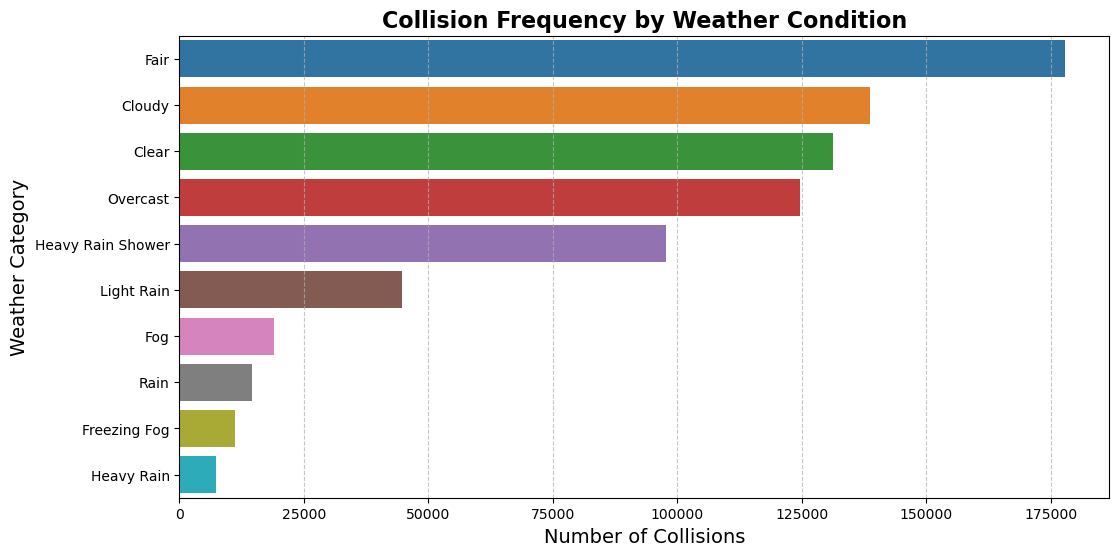

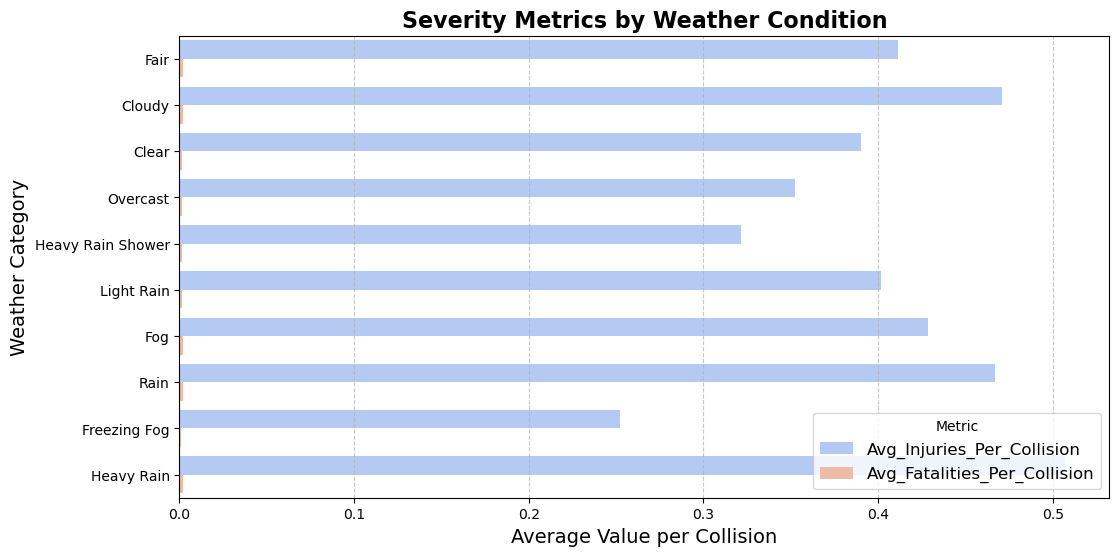

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate data for frequency and severity
weather_analysis = (
    merged_data2.groupby("Weather Category")
    .agg(
        Collision_Count=("Weather Category", "count"),
        Total_Injuries=("NUMBER OF PERSONS INJURED", "sum"),
        Total_Fatalities=("NUMBER OF PERSONS KILLED", "sum"),
    )
    .reset_index()
)

# Step 2: Calculate average severity per collision
weather_analysis["Avg_Injuries_Per_Collision"] = (
    weather_analysis["Total_Injuries"] / weather_analysis["Collision_Count"]
)
weather_analysis["Avg_Fatalities_Per_Collision"] = (
    weather_analysis["Total_Fatalities"] / weather_analysis["Collision_Count"]
)

# Step 3: Filter for top weather categories by collision frequency
top_weather_conditions = weather_analysis.nlargest(10, "Collision_Count")

# Step 4: Visualization - Collision Frequency
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_weather_conditions,
    x="Collision_Count",
    y="Weather Category",
    palette=sns.color_palette("tab10", len(top_weather_conditions)),
)
plt.title("Collision Frequency by Weather Condition", fontsize=16, fontweight="bold")
plt.xlabel("Number of Collisions", fontsize=14)
plt.ylabel("Weather Category", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Step 5: Visualization - Severity (Average Injuries and Fatalities)
severity_metrics = top_weather_conditions.melt(
    id_vars="Weather Category",
    value_vars=["Avg_Injuries_Per_Collision", "Avg_Fatalities_Per_Collision"],
    var_name="Metric",
    value_name="Value",
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=severity_metrics,
    x="Value",
    y="Weather Category",
    hue="Metric",
    palette="coolwarm",
)
plt.title("Severity Metrics by Weather Condition", fontsize=16, fontweight="bold")
plt.xlabel("Average Value per Collision", fontsize=14)
plt.ylabel("Weather Category", fontsize=14)
plt.legend(title="Metric", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


1. Collision Frequency by Weather Condition
- The highest number of collisions occurred during Fair weather, followed by Cloudy, Clear, and Overcast conditions.
- Weather conditions like Heavy Rain, Freezing Fog, and Fog resulted in significantly fewer collisions.
- Light Rain and Heavy Rain Showers contributed to a moderate number of collisions.

2. Severity Metrics by Weather Condition
- Rainy and Heavy Rain conditions had the highest average injuries per collision, making them particularly hazardous.
- Cloudy weather also showed a notable level of severity in terms of injuries.
- Although collisions in Freezing Fog were less frequent, they had a relatively higher rate of fatalities per collision.
- Heavy Rain stood out as a weather condition with elevated injuries and fatalities.

**RESEARCH QUESTION 2**
What are the peak times for vehicle collision under different weather condition

In [58]:
# Extract hour from crash time
merged_data2["CRASH HOUR"] = pd.to_datetime(merged_data2["CRASH TIME"], format='%H:%M').dt.hour

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
# Get the top 10 weather categories by collision count
top_weather = (
    merged_data2['Weather Category']
    .value_counts()
    .head(10)
    .index
)

# Filter the dataset for only the top 10 weather categories
filtered_data = merged_data2[merged_data2['Weather Category'].isin(top_weather)]


In [60]:
# Group by Weather Category and Crash Hour
peak_times_top10 = (
    filtered_data.groupby(['Weather Category', 'CRASH HOUR'])['COLLISION_ID']
    .count()
    .reset_index()
    .sort_values(['Weather Category', 'COLLISION_ID'], ascending=[True, False])
)

# Rename columns for better readability
peak_times_top10.columns = ['Weather Category', 'Crash Hour', 'Collision Count']

# Display the peak hour for each weather category
print(peak_times_top10.groupby('Weather Category').head(1))


      Weather Category  Crash Hour  Collision Count
16               Clear          16            10968
41              Cloudy          17            10241
62                Fair          14            11786
84                 Fog          12             1591
104       Freezing Fog           8             1052
138         Heavy Rain          18              453
161  Heavy Rain Shower          17             9911
186         Light Rain          18             3086
200           Overcast           8             9058
233               Rain          17             1060


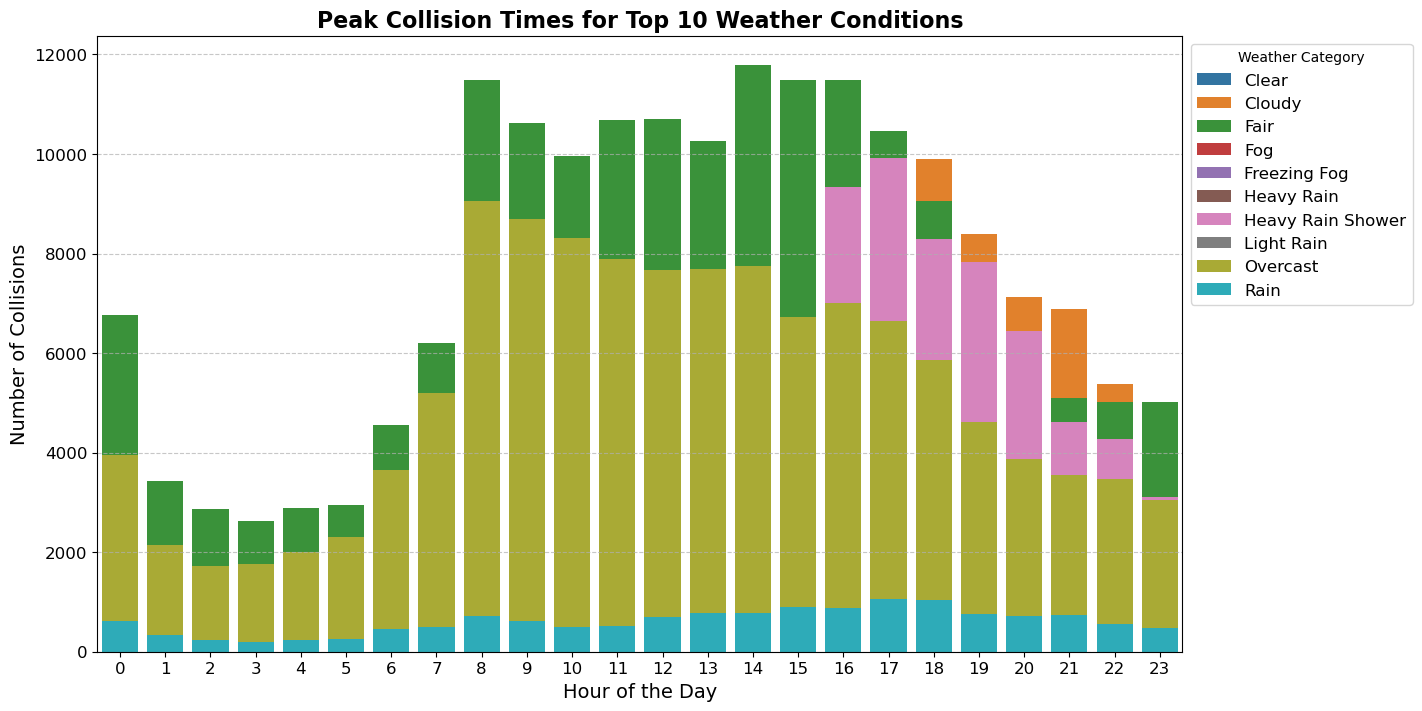

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot peak times for top 10 weather categories
plt.figure(figsize=(14, 8))
sns.barplot(
    data=peak_times_top10,
    x='Crash Hour',
    y='Collision Count',
    hue='Weather Category',
    dodge=False
)
plt.title('Peak Collision Times for Top 10 Weather Conditions', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Collisions', fontsize=14)
plt.legend(title='Weather Category', fontsize=12, bbox_to_anchor=(1, 1))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Peak Collision Times for Top 10 Weather Conditions**

The graph shows the distribution of collisions across different times of the day, categorized by **weather conditions**. The x-axis represents the **hours of the day** (0–23), and the y-axis indicates the **number of collisions**.

1. **Peak Collision Times**  
   - Collisions peak between **7 AM to 6 PM**. This likely corresponds to **rush hours** when traffic volume is highest.  
   - The highest number of collisions occurs around **8 AM** and **5 PM**, suggesting that **morning and evening commutes** are particularly risky.  

2. **Weather Condition Trends**  
   - **Fair weather (green)** and **Overcast (yellow)** dominate the majority of collisions, especially during peak hours.  
     - **Fair weather** collisions are prominent in the morning and late afternoon.  
   - **Rain (blue)** and **Heavy Rain Showers (pink)** appear more frequently during the evening hours (e.g., 5 PM–10 PM).  

3. **Time-Specific Observations**  
   - **Midnight to Early Morning (0–5 hours):**  
     - Collision numbers are relatively low, with **Fair weather** and **Overcast** being the primary contributors.  
   - **Morning (6–9 hours):**  
     - A sharp increase in collisions occurs during this period, driven by **Fair weather** and **Overcast**.  
   - **Midday to Afternoon (10–17 hours):**  
     - The number of collisions remains high throughout this period, dominated by **Fair**, **Overcast**, and some **Rain** conditions.  
   - **Evening (18–23 hours):**  
     - Collisions remain substantial but gradually decrease after 6 PM.  
     - **Heavy Rain Showers** and **Rain** show significant contributions in the evening, especially around **6–9 PM**.  
     - **Cloudy (orange)** weather also becomes noticeable during evening hours.

We clearly got answers to some questions like 
- **When do most collisions happen?**  
  - During **rush hours**: **8 AM** and **5–6 PM**.  
- **Which weather conditions dominate?**  
  - **Fair weather** and **Overcast** cause the most collisions overall.  
- **What happens in the evening?**  
  - **Rainy** and **Cloudy** weather contribute more during evening hours.  
- **What about early morning?**  
  - Collisions are fewer but still occur under **Fair** and **Overcast** weather conditions.


**RESEARCH QUESTION 3**


In [ ]:
fatal_crashes = merged_data2[merged_data2['NUMBER OF PERSONS KILLED'] > 0]

# Combine the vehicle type columns for analysis
vehicle_columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Melt the vehicle columns into a single column
vehicle_types = fatal_crashes[vehicle_columns].melt(value_name='Vehicle Type').dropna()

# Count the number of occurrences of each vehicle type
vehicle_counts = vehicle_types['Vehicle Type'].value_counts().reset_index()
vehicle_counts.columns = ['Vehicle Type', 'Frequency']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Vehicle Type', y='Frequency', data=vehicle_counts.head(10), palette='viridis')
plt.title('Top Vehicle Types Contributing to Fatal Crashes')
plt.xlabel('Vehicle Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'merged_data2' is not defined

**"Top 10 Vehicle Types in Severe Collisions"**

1. **Sedan**:
   - **Count**: ~8,500
   - Sedans contribute the highest number of severe collisions by a large margin.
   - This could be due to the high number of sedans on the road, making them more prone to accidents statistically.

2. **Station Wagon/Sport Utility Vehicle (SUV)**:
   - **Count**: ~6,500
   - SUVs rank second, which may relate to their increasing popularity as family and multi-purpose vehicles.
   - Despite their robust build, the larger size and weight of SUVs can increase accident severity.

3. **Pick-up Truck** and **Taxi**:
   - Both have relatively lower counts, roughly between 500–700 collisions.
   - Taxis, due to frequent stops and city driving, might be involved in collisions in urban environments.

4. **Box Truck, Bike, and Bus**:
   - Each has a small but noticeable count, below 500.
   - Trucks and buses, though involved in fewer collisions, can cause significant damage due to their size.

5. **Motorcycle, Van, and Convertible**:
   - These vehicle types have the lowest counts in severe collisions, indicating they are less frequently involved in such incidents.
   - However, motorcycles, despite lower counts, often face more severe outcomes due to rider vulnerability.


Hence we can successfully sa that,
1. **Sedans and SUVs** are disproportionately involved in severe collisions, likely due to their higher prevalence on the road.
2. Commercial vehicles such as **taxis, trucks, and buses** appear on the list but contribute fewer collisions compared to private vehicles.
3. **Motorcycles and Convertibles** rank at the bottom, which may be due to their lower overall usage relative to other vehicle types.


This chart highlights the dominance of **sedans and SUVs** in severe collisions, reinforcing the importance of targeted interventions to reduce accident rates.

**REASERCH QUESTION 4**

In [62]:
# Filter for sedan-related collisions
sedan_data = merged_data2[
    (merged_data2['VEHICLE TYPE CODE 1'].str.contains('Sedan', na=False)) |
    (merged_data2['VEHICLE TYPE CODE 2'].str.contains('Sedan', na=False)) |
    (merged_data2['VEHICLE TYPE CODE 3'].str.contains('Sedan', na=False)) |
    (merged_data2['VEHICLE TYPE CODE 4'].str.contains('Sedan', na=False)) |
    (merged_data2['VEHICLE TYPE CODE 5'].str.contains('Sedan', na=False))
]



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



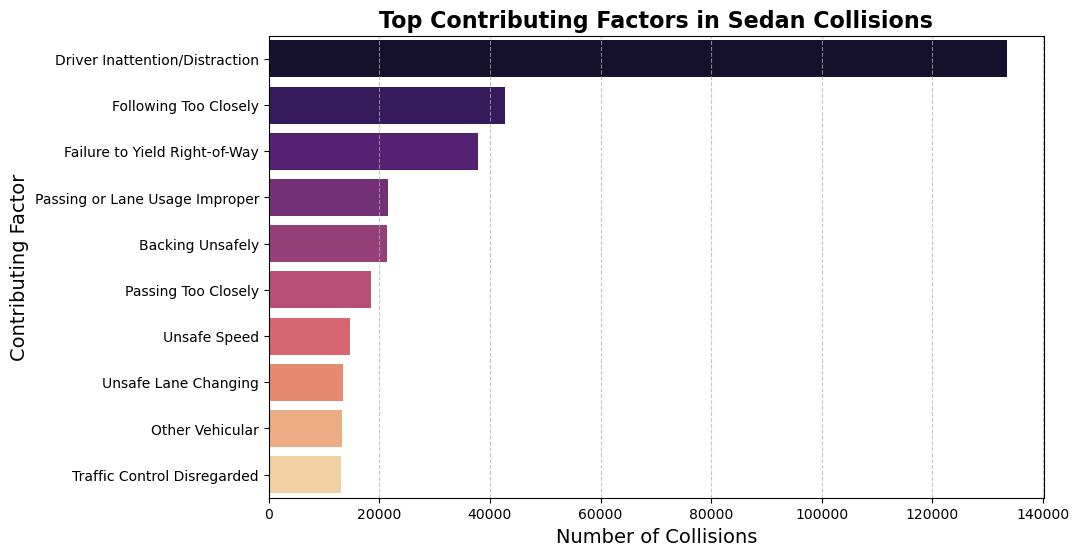

In [63]:
# Count contributing factors and filter for top 10
top_factors_sedan = sedan_data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(10)

# Filter the data to include only rows with the top contributing factors
filtered_sedan_data = sedan_data[sedan_data['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_factors_sedan.index)]


# Recount contributing factors for the filtered data
filtered_top_factors_sedan = filtered_sedan_data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
filtered_top_factors_sedan=filtered_top_factors_sedan[filtered_top_factors_sedan>0]
# Plot top contributing factors
plt.figure(figsize=(10, 6))
sns.barplot(
    x=filtered_top_factors_sedan.values,
    y=filtered_top_factors_sedan.index.tolist(),
    palette='magma'
)
plt.title("Top Contributing Factors in Sedan Collisions", fontsize=16, fontweight='bold')
plt.xlabel("Number of Collisions", fontsize=14)
plt.ylabel("Contributing Factor", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



**1. Driver Inattention/Distraction**
- **Number of Collisions**: 135,000 (approximate).
- This is the most significant contributing factor to sedan collisions, far surpassing all other causes.
- Distractions may include mobile phone usage, in-car systems, eating/drinking, or external distractions like billboards.

**2. Following Too Closely**
- **Number of Collisions**: 45,000.
- Maintaining an insufficient distance from the vehicle in front increases rear-end collisions, especially during sudden stops.

**3. Failure to Yield Right-of-Way**
- **Number of Collisions**: 40,000.
- This occurs when drivers fail to allow other vehicles, pedestrians, or cyclists their legal priority at intersections or while merging.

**4. Passing or Lane Usage Improper**
- **Number of Collisions**: 25,000.
- Improper lane changes, such as not signaling, unsafe overtaking, or weaving between lanes, contribute significantly.

**5. Backing Unsafely**
- **Number of Collisions**: 20,000.
- Unsafe reversing, such as failing to check for obstacles, contributes to collisions, especially in parking lots and driveways.

**6. Passing Too Closely**
- **Number of Collisions**: 18,000.
- This involves minimal clearance while overtaking or sharing lanes, leading to sideswipe collisions.

**7. Unsafe Speed**
- **Number of Collisions**: 15,000.
- Speeding beyond safe limits reduces driver reaction time and control, increasing accident likelihood and severity.

**8. Unsafe Lane Changing**
- **Number of Collisions**: 14,000.
- Related to abrupt or improper lane changes, often without signaling or awareness of blind spots.

**9. Other Vehicular**
- **Number of Collisions**: 13,000.
- This could include mechanical failures, such as brake issues, tire blowouts, or other unspecified vehicle-related problems.

**10. Traffic Control Disregarded**
- **Number of Collisions**: 12,000.
- Violations like running red lights, stop signs, or ignoring traffic signals contribute to this category.

                      
1. **Driver Inattention/Distraction** accounts for the majority of collisions, highlighting the urgent need for measures against distracted driving.
2. **Following Too Closely** and **Failure to Yield Right-of-Way** are also major contributors, reflecting issues in driving etiquette and adherence to road rules.
3. Categories like **Unsafe Speed** and **Unsafe Lane Changes** emphasize driver behavior as a critical factor in preventing collisions.
4. Mechanical and vehicular issues remain minor in comparison, suggesting most collisions are due to **human error**.


This analysis clearly points toward human negligence as the root cause of most sedan collisions, emphasizing the need for education, enforcement, and technological interventions.

**RESEARCH QUESTION 5**


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



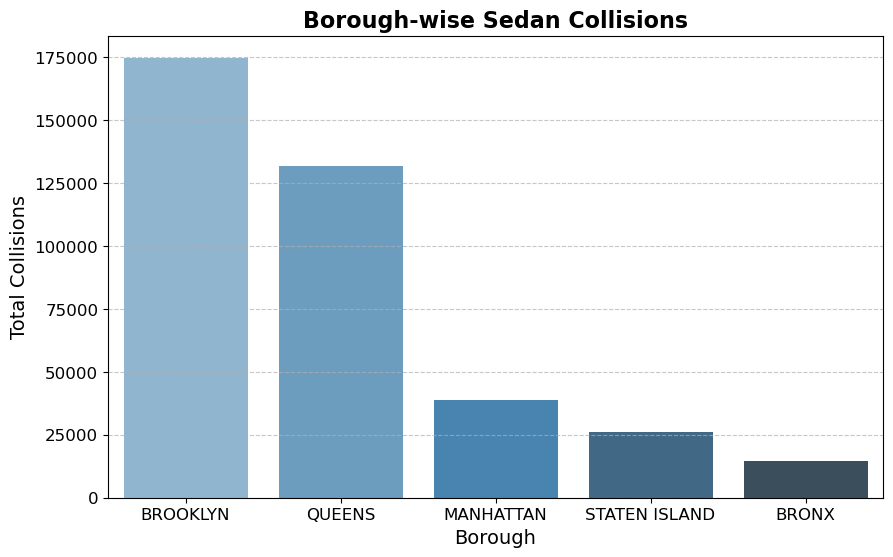

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sedan collision data by borough
borough_sedan_collisions = sedan_data.groupby('BOROUGH').agg(
    Total_Collisions=('COLLISION_ID', 'count')
).reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(
    data=borough_sedan_collisions.sort_values('Total_Collisions', ascending=False),
    x='BOROUGH',
    y='Total_Collisions',
    palette='Blues_d'
)
plt.title('Borough-wise Sedan Collisions', fontsize=16, fontweight='bold')
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Total Collisions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



1. **Brooklyn**:
   - **Total Collisions**: ~175,000
   - Brooklyn has the **highest number of sedan collisions** among all boroughs.
   - Factors such as high population density, heavy traffic flow, and frequent intersections likely contribute to this trend.

2. **Queens**:
   - **Total Collisions**: ~130,000
   - Queens ranks second, with a significant number of collisions, though notably fewer than Brooklyn.
   - This may be attributed to the borough's extensive road network and mixed urban-suburban characteristics.

3. **Manhattan**:
   - **Total Collisions**: ~40,000
   - Despite its high vehicle congestion and dense population, Manhattan has considerably fewer sedan collisions compared to Brooklyn and Queens.
   - This could be due to lower speeds resulting from heavy traffic and better pedestrian infrastructure.

4. **Staten Island**:
   - **Total Collisions**: ~25,000
   - Staten Island shows relatively fewer collisions, likely due to its smaller population and lower vehicular density compared to other boroughs.

5. **Bronx**:
   - **Total Collisions**: ~15,000
   - The Bronx has the **lowest number of sedan collisions**.
   - This might be influenced by fewer roadways and lower traffic volumes.


After The above study of data we can clearly say that,
1. **Brooklyn and Queens** dominate the sedan collision statistics, together accounting for the vast majority of collisions.
2. The **Bronx and Staten Island** have significantly fewer collisions, likely due to lower vehicular density and population.
3. Manhattan's results suggest a possible balance between traffic congestion and speed, reducing severe incidents.

